**Mount Drive**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

In [3]:
import glob

In [4]:
from IPython.display import Image, display

In [5]:
!nvidia-smi

Sat Jan  6 17:49:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
HOME = os.getcwd()

In [7]:
print(HOME)

/content


In [8]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


**Training Data in Yolov8m Models**

In [9]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/data.yaml epochs=100 imgsz=640 save=True

/content
100% 49.7M/49.7M [00:00<00:00, 223MB/s]
Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

In [10]:
!ls /content/runs/detect/train

args.yaml					    P_curve.png		 train_batch1261.jpg
confusion_matrix_normalized.png			    PR_curve.png	 train_batch1262.jpg
confusion_matrix.png				    R_curve.png		 train_batch1.jpg
events.out.tfevents.1704563653.daffc479d7ad.2957.0  results.csv		 train_batch2.jpg
F1_curve.png					    results.png		 val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					    train_batch1260.jpg  weights


**Show Training Confusion Matrix**

/content


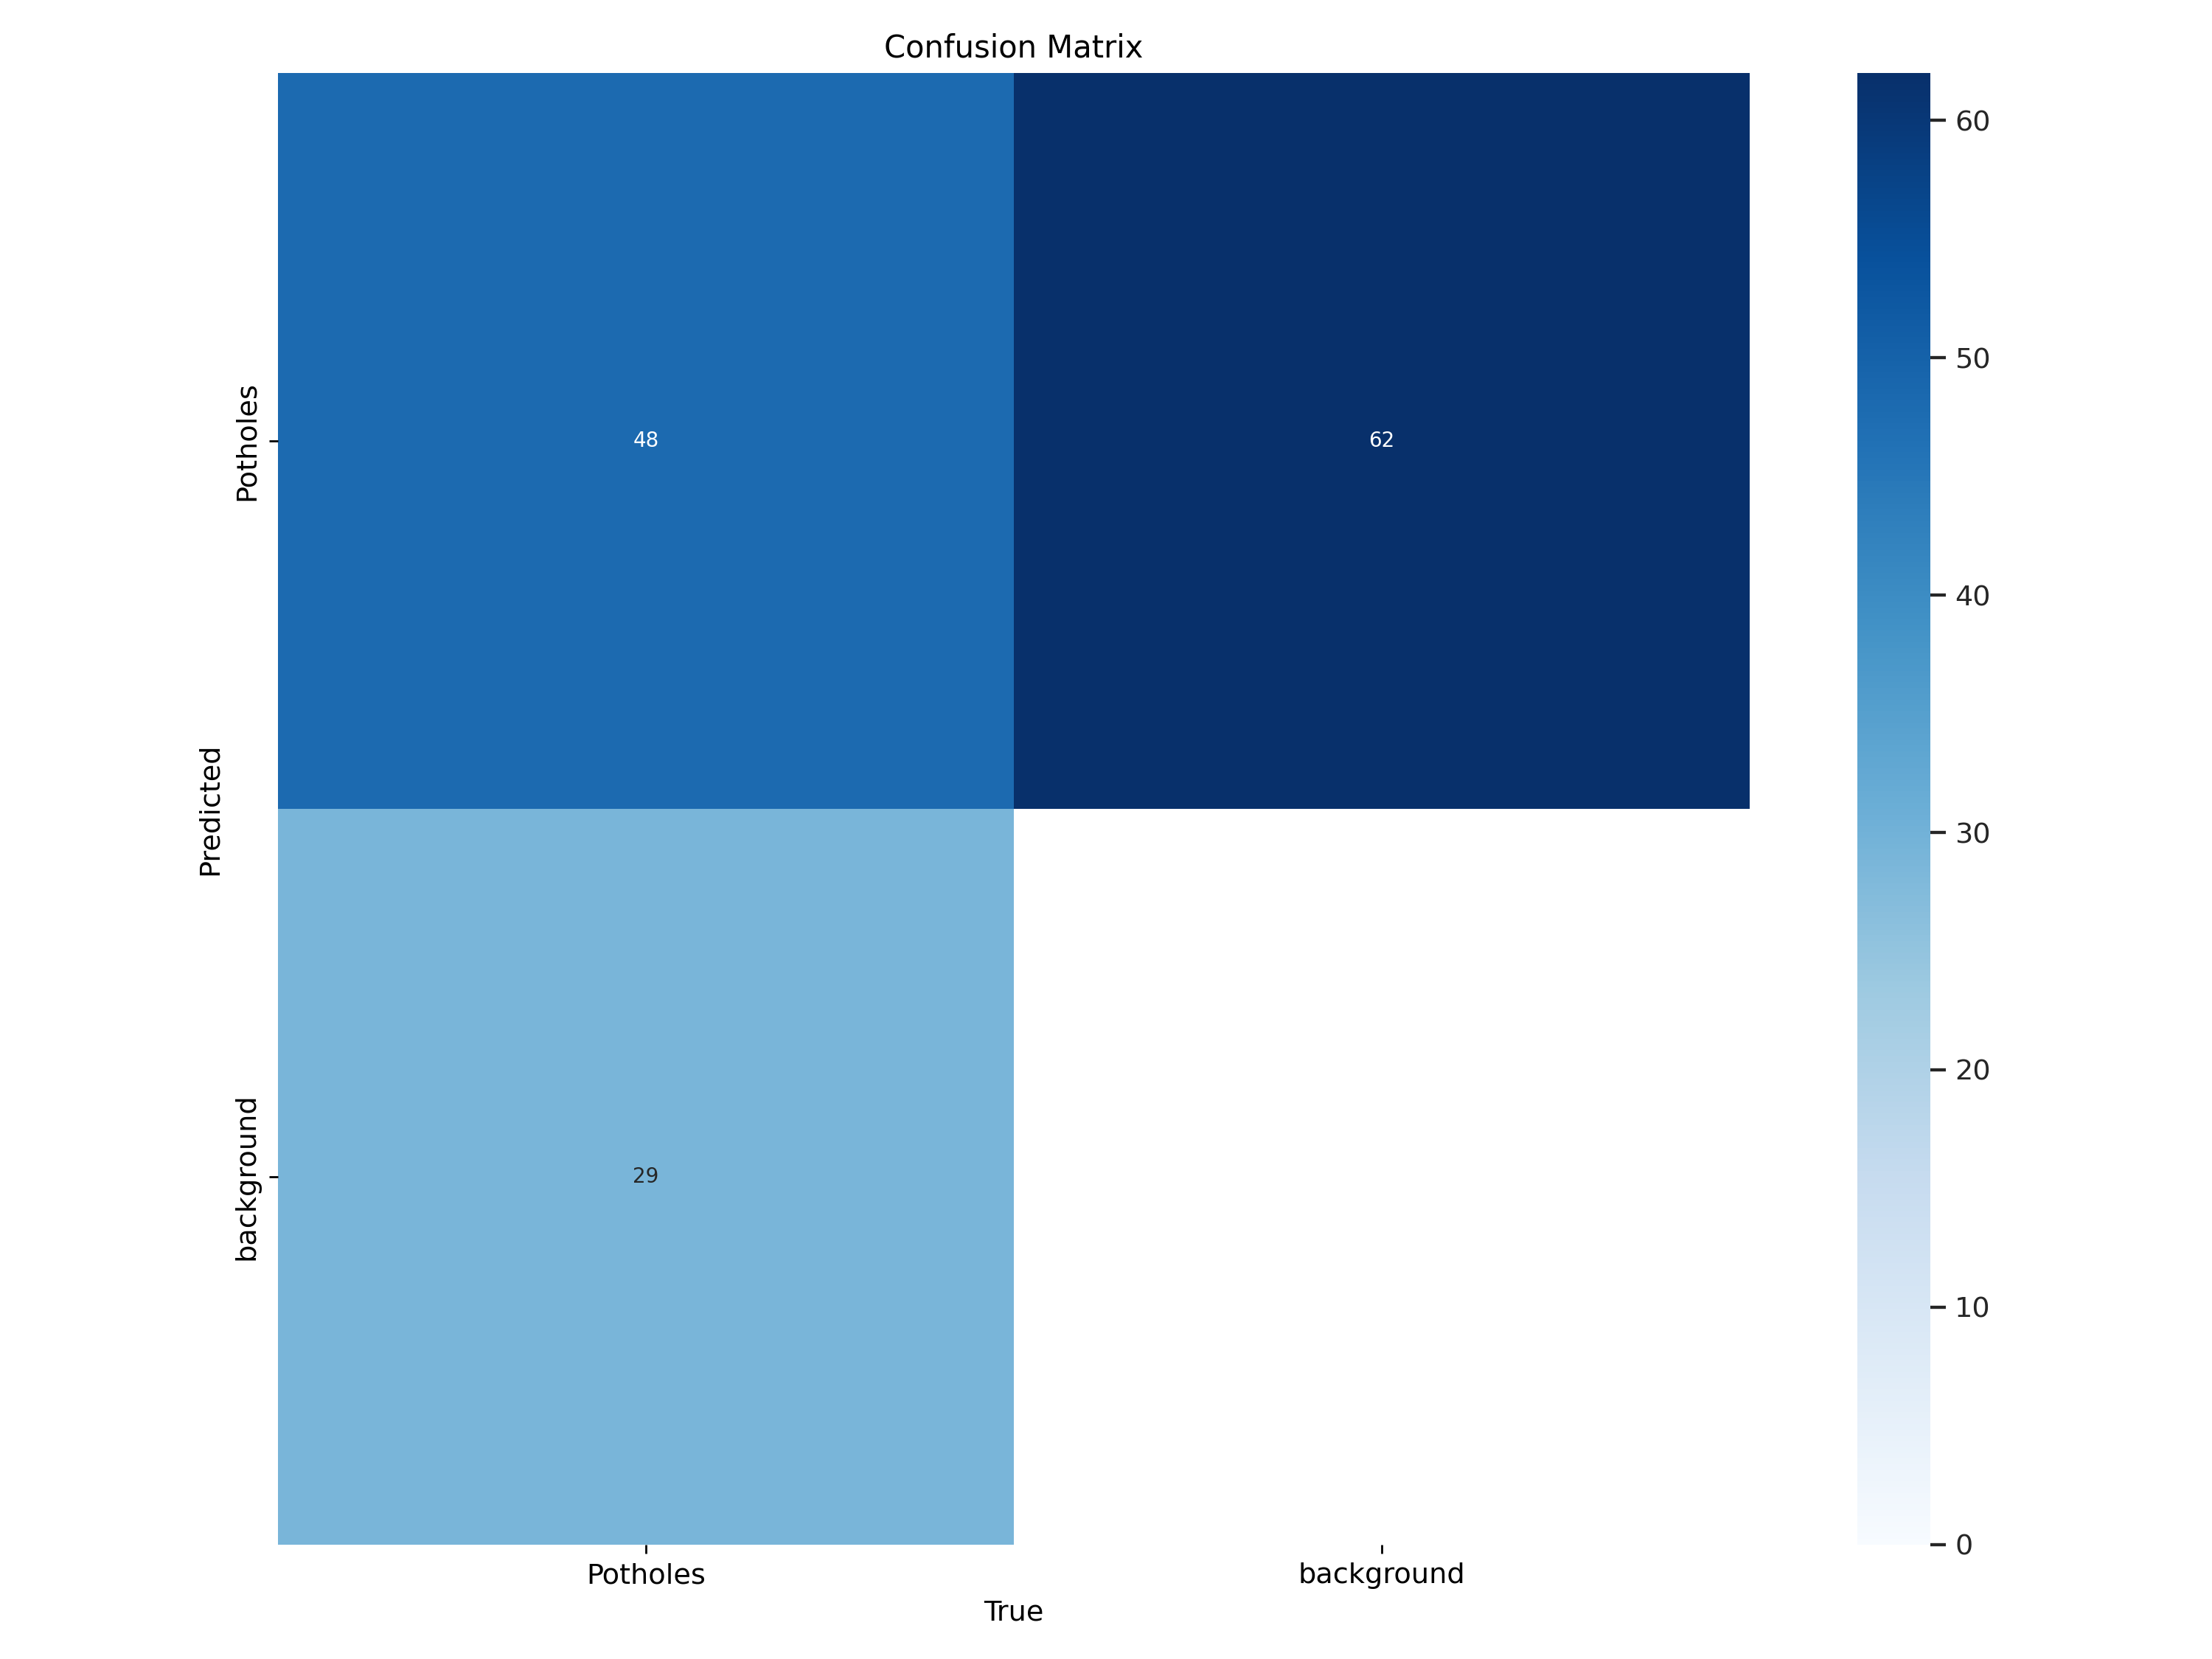

In [15]:
%cd {HOME}

Image(filename = f'/content/runs/detect/train/confusion_matrix.png', width = 900)

/content


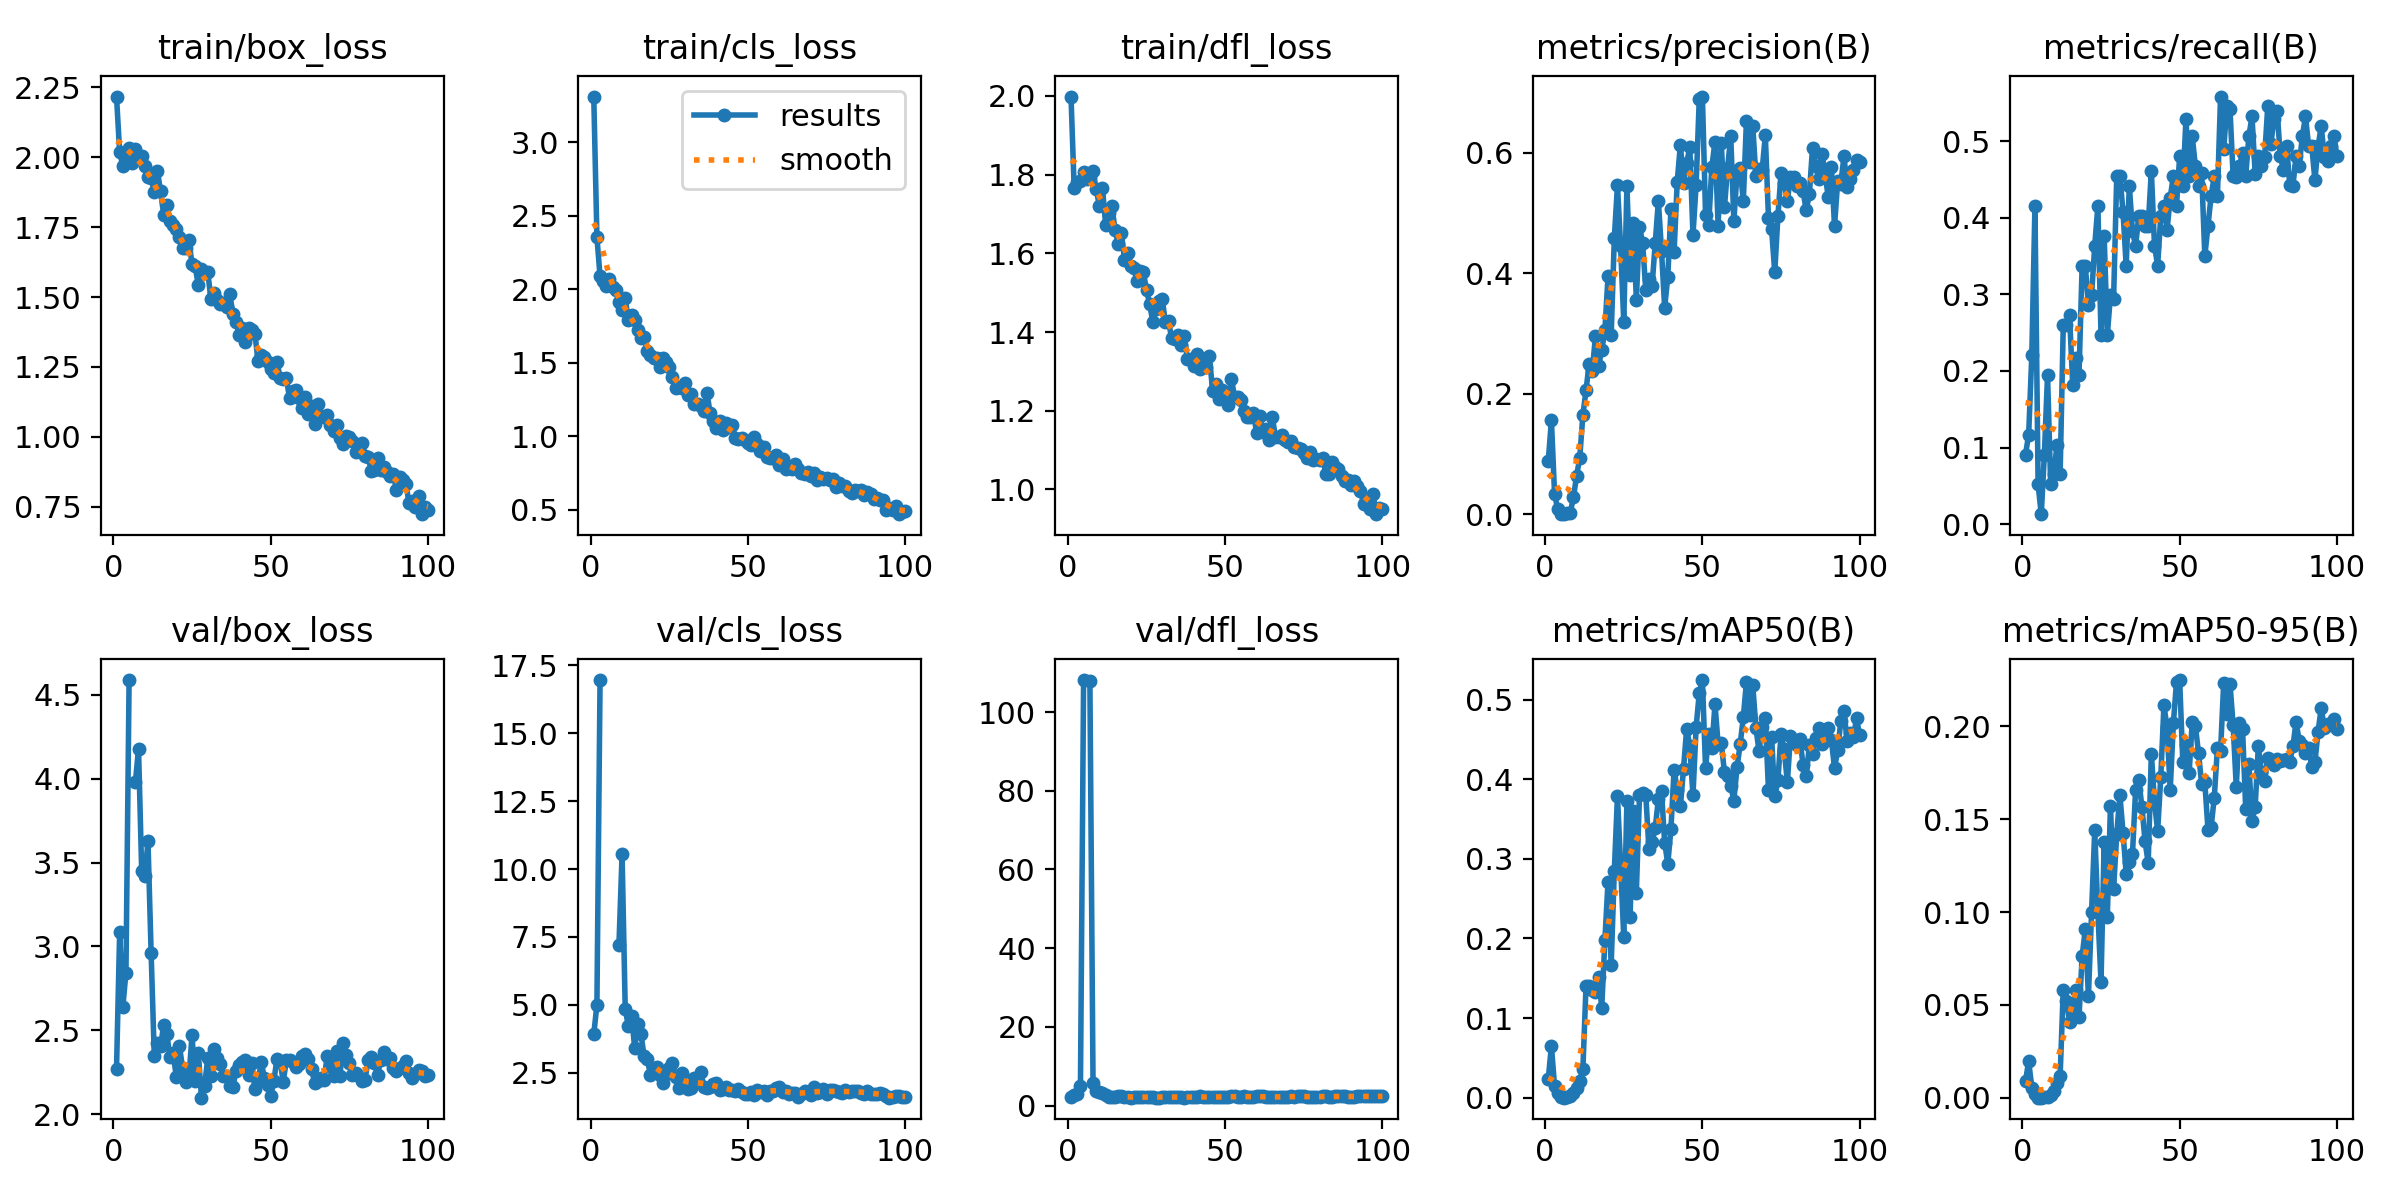

In [16]:
%cd {HOME}

Image(filename = f'/content/runs/detect/train/results.png', width = 600)

/content


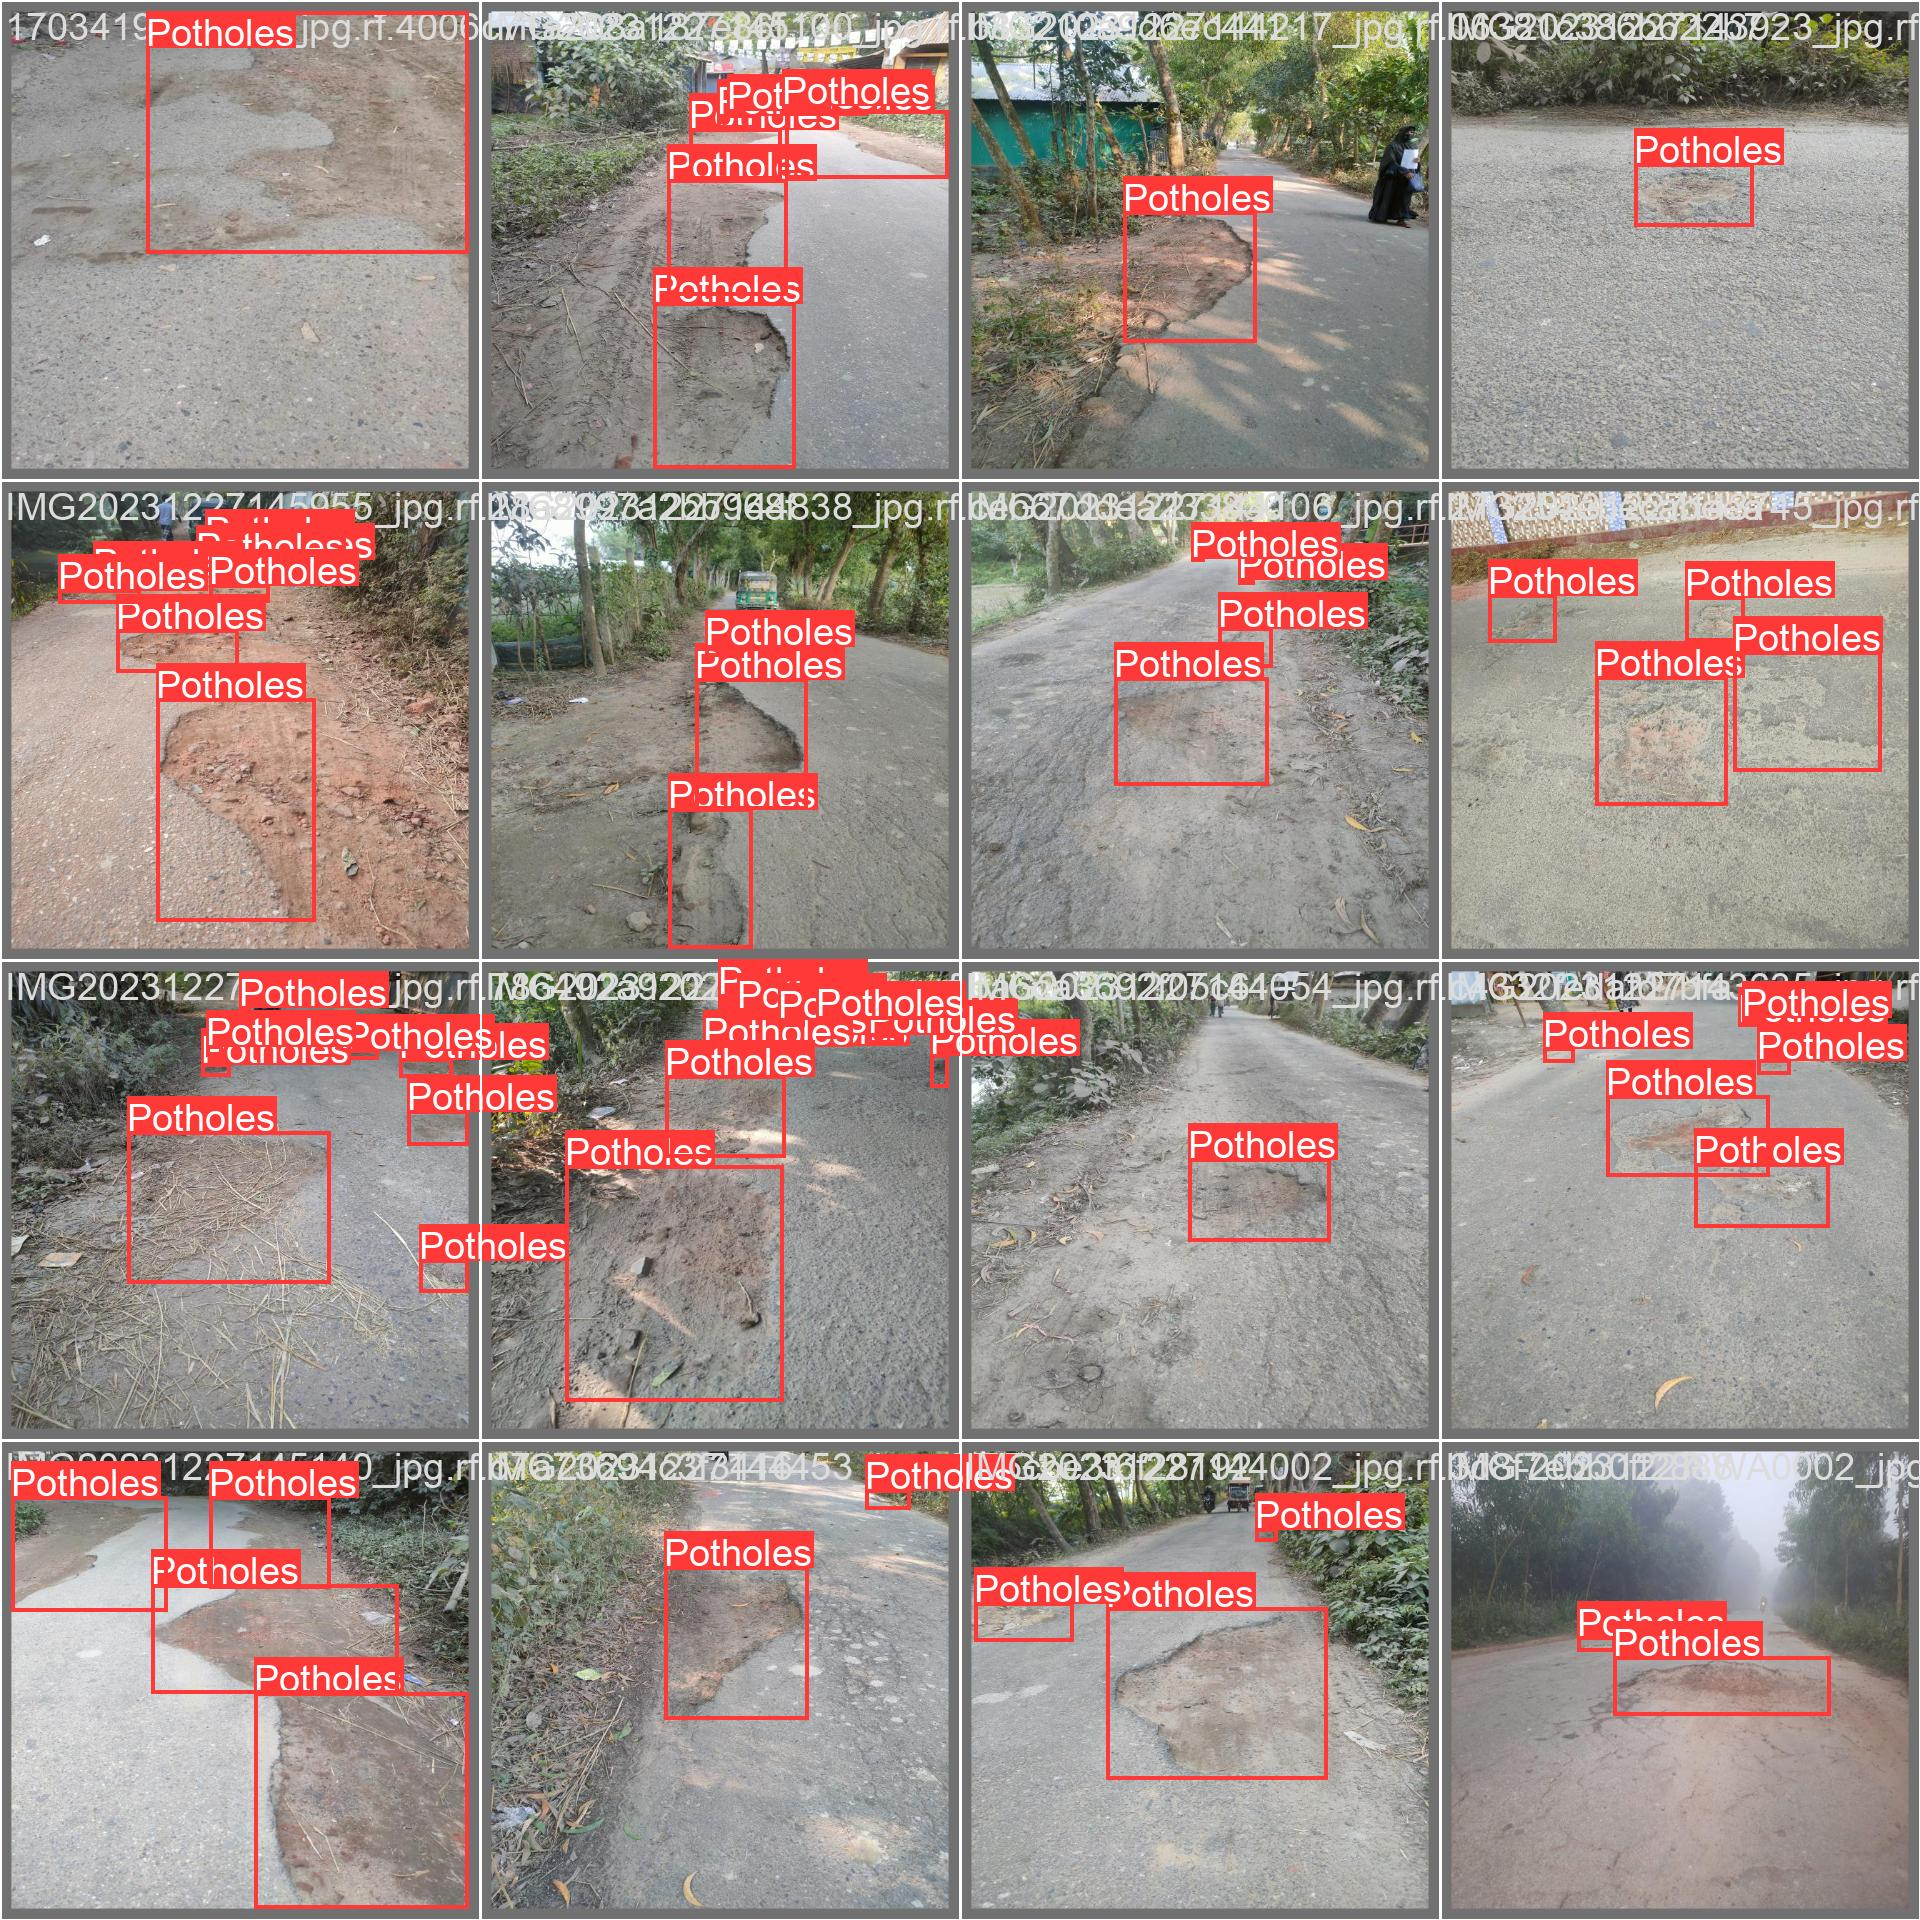

In [18]:
%cd {HOME}

Image(filename = f'/content/runs/detect/train/val_batch0_labels.jpg', width = 600)

In [19]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/data.yaml save=True

/content
Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.08it/s]
                   all         18         77      0.666      0.468      0.518      0.219
Speed: 0.3ms preprocess, 43.3ms inference, 0.0ms loss, 32.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


/content


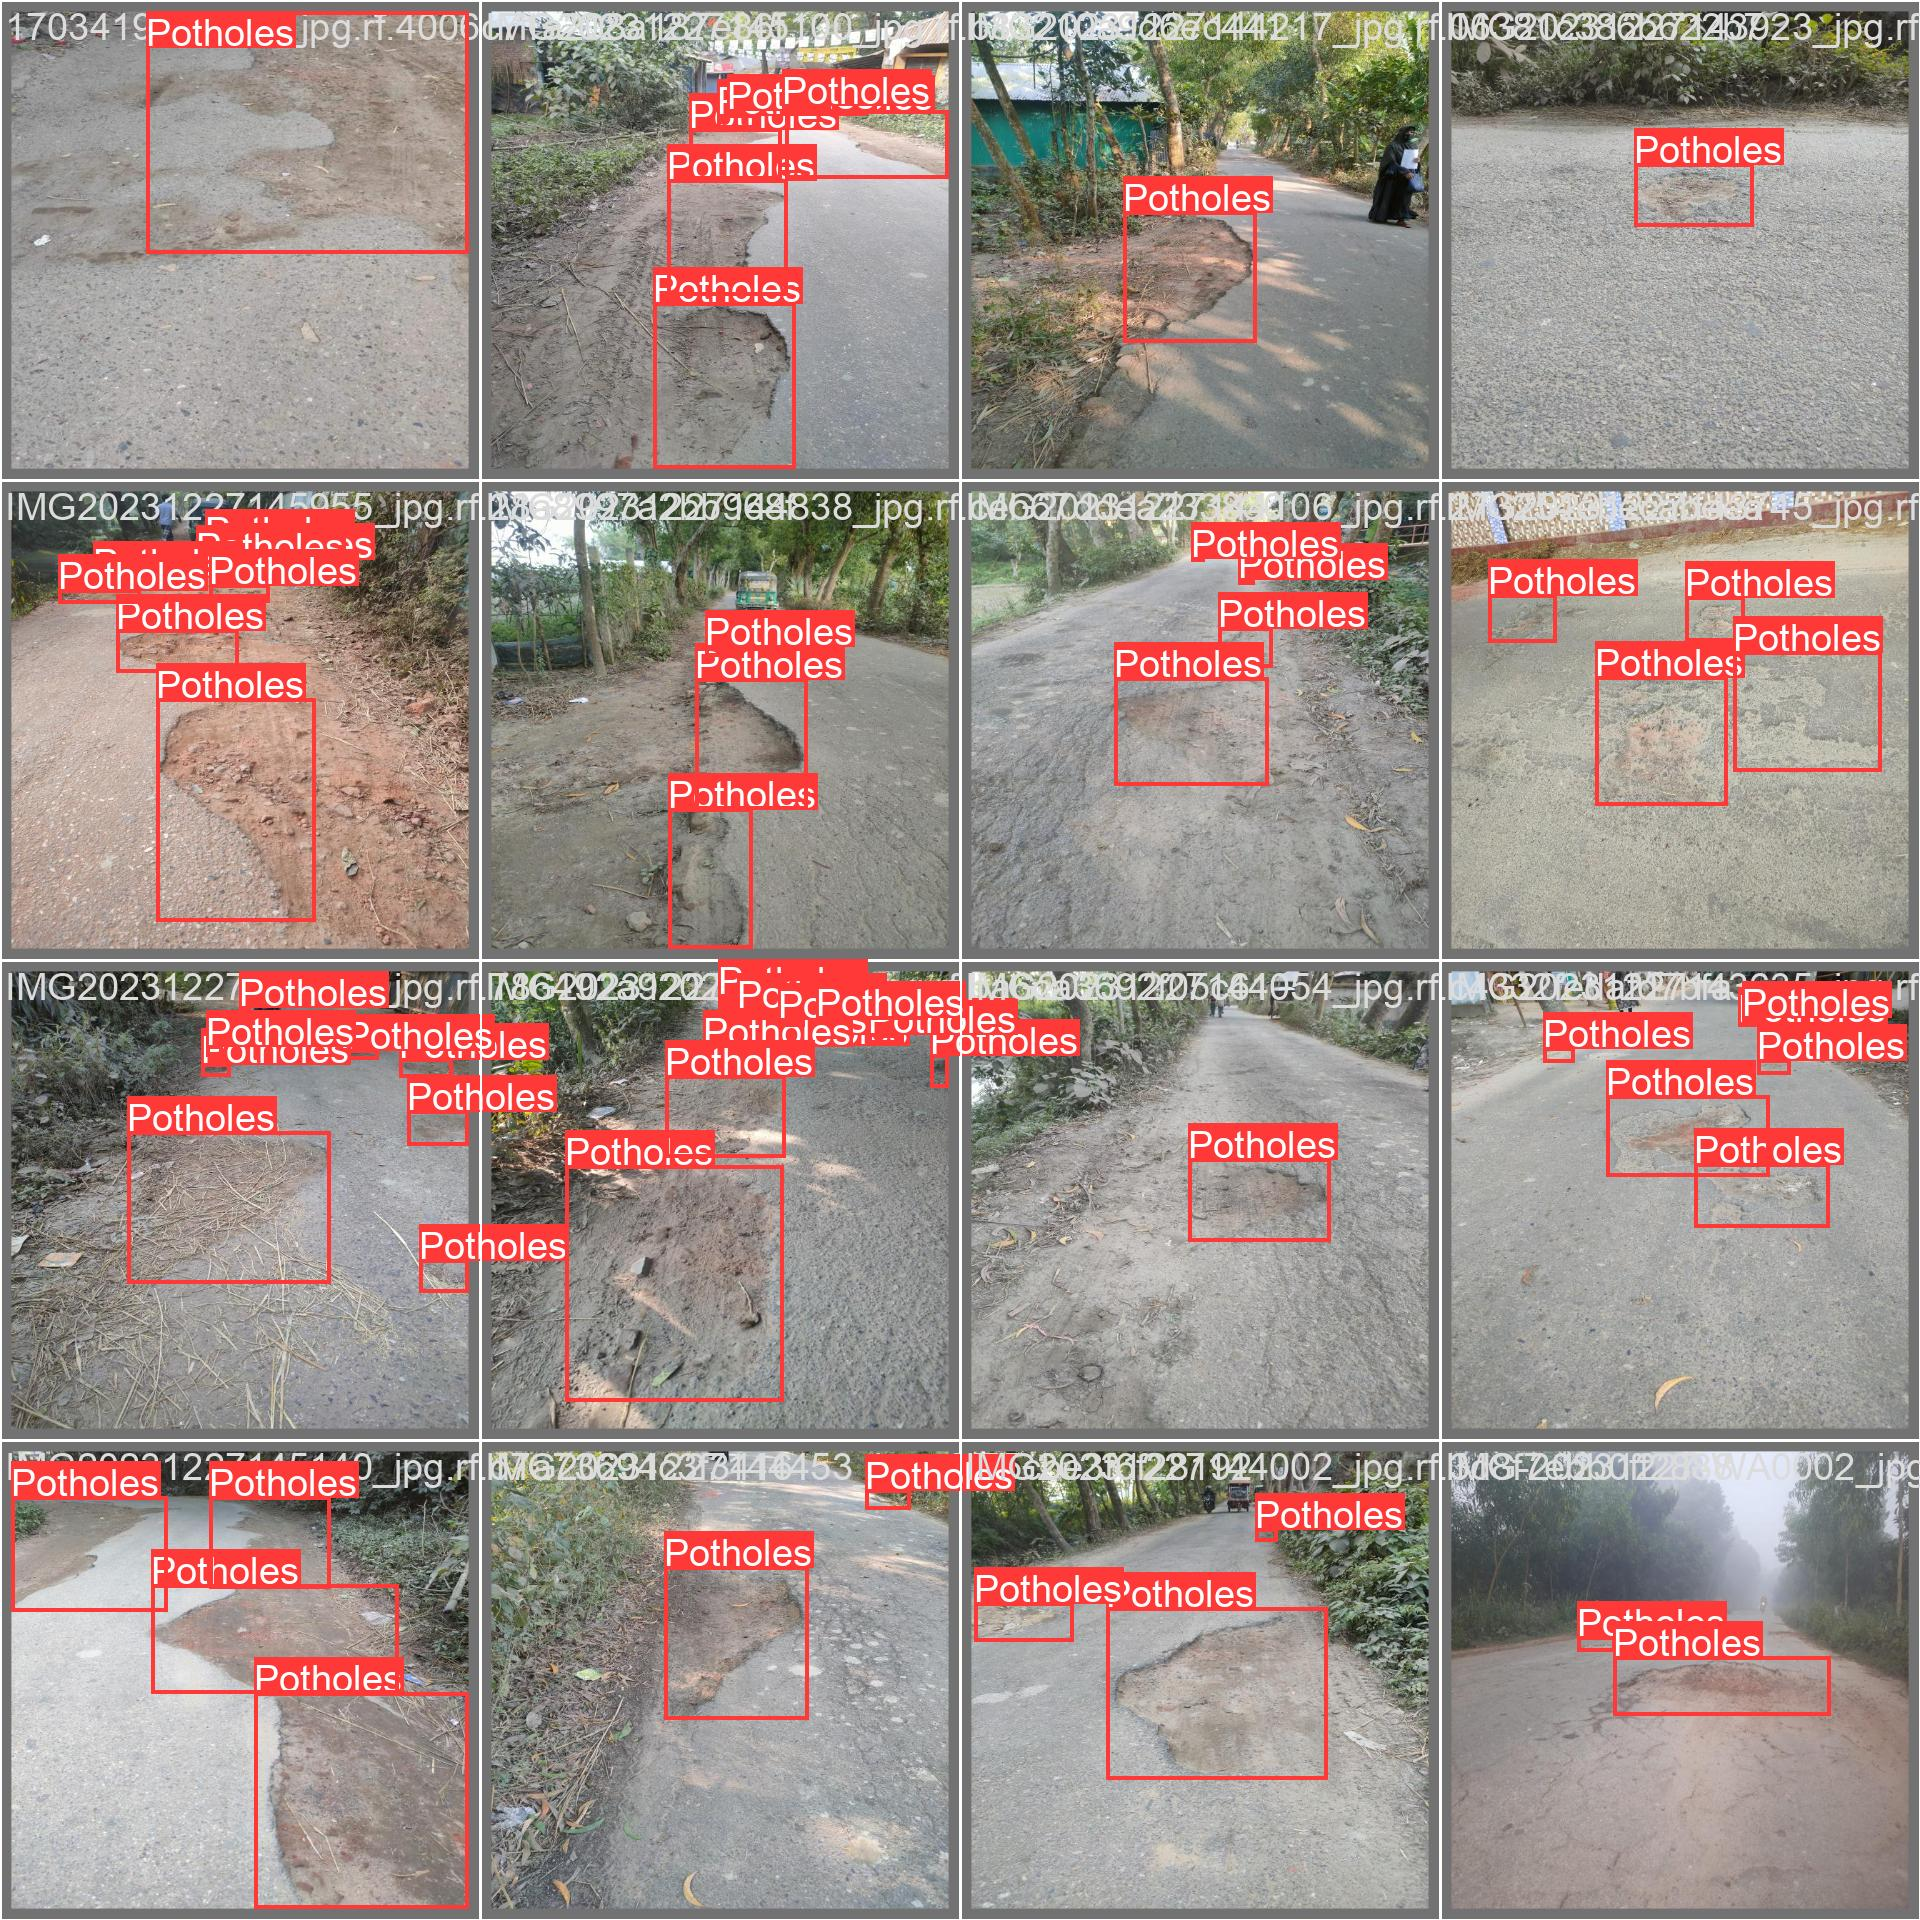

In [20]:
%cd {HOME}

Image(filename = f'/content/runs/detect/val/val_batch0_labels.jpg', width = 600)

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/drive/MyDrive/final_pothole_detection/best.pt conf=0.25 source=/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images save=True

/content
Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/1703419965934_jpg.rf.4006c71a208a187e86fb28bdbcdba62b.jpg: 640x640 (no detections), 37.1ms
image 2/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/IMG-20231227-WA0002_jpg.rf.82fb971bab62658e7d9f212a08707c76.jpg: 640x640 1 Potholes, 37.2ms
image 3/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/IMG20231227143635_jpg.rf.277d4e2d1dfaf9d78801d658edb6c08a.jpg: 640x640 3 Potholess, 37.2ms
image 4/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/IMG20231227143745_jpg.rf.bd972a82b5da131b6d03a11529f2ed0d.jpg: 640x640 1 Potholes, 37.1ms
image 5/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/IMG20231227143923_jpg.

In [36]:
from PIL import Image

In [ ]:
Image.open('/content/runs/detect/predict3/IMG-20231227-WA0002_jpg.rf.82fb971bab62658e7d9f212a08707c76.jpg')

In [23]:
from PIL import Image
from ultralytics import YOLO
import ultralytics
import numpy as np
from cv2 import imread
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [25]:
# Load a pretrained YOLOv8n model
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [26]:
# Run inference on '.jpg'
results = model('/content/drive/MyDrive/final_pothole_detection/img1.jpeg',show_conf=False,save=True)  # results list


image 1/1 /content/drive/MyDrive/final_pothole_detection/img1.jpeg: 512x640 9 Potholess, 74.7ms
Speed: 3.7ms preprocess, 74.7ms inference, 521.1ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict


In [27]:
# Load the predicted image
predicted_img_path = '/content/runs/detect/predict/img1.jpeg'
predicted_img = imread(predicted_img_path)

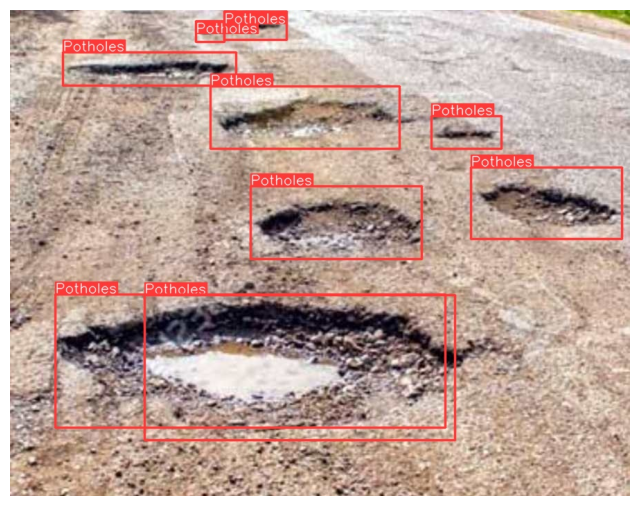

In [28]:
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(predicted_img)
plt.axis('off')  # Hide axes
plt.show()

In [29]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/final_pothole_detection/v.mp4' save=True

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/324) /content/drive/MyDrive/final_pothole_detection/v.mp4: 384x640 10 Potholess, 117.1ms
video 1/1 (2/324) /content/drive/MyDrive/final_pothole_detection/v.mp4: 384x640 14 Potholess, 25.1ms
video 1/1 (3/324) /content/drive/MyDrive/final_pothole_detection/v.mp4: 384x640 10 Potholess, 25.0ms
video 1/1 (4/324) /content/drive/MyDrive/final_pothole_detection/v.mp4: 384x640 10 Potholess, 25.1ms
video 1/1 (5/324) /content/drive/MyDrive/final_pothole_detection/v.mp4: 384x640 11 Potholess, 24.2ms
video 1/1 (6/324) /content/drive/MyDrive/final_pothole_detection/v.mp4: 384x640 9 Potholess, 22.6ms
video 1/1 (7/324) /content/drive/MyDrive/final_pothole_detection/v.mp4: 384x640 9 Potholess, 22.6ms
video 1/1 (8/324) /content/drive/MyDrive/final_pothole_detection/v.mp4: 384x640 9 Potholess, 22.5ms
video 1/1 (9/324) /conte